In [27]:
import tensorflow as tf
import pandas as pd
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np

## Creating data to view and fit

In [10]:
n_samples = 1000
# Create circles
X, Y = make_circles(n_samples, noise=0.03, random_state=42)

In [11]:
# Check the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [12]:
# Check the labels
Y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [13]:
circles = pd.DataFrame({'X0': X[:, 0], 'X1': X[:, 1], 'label': Y})

In [14]:
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


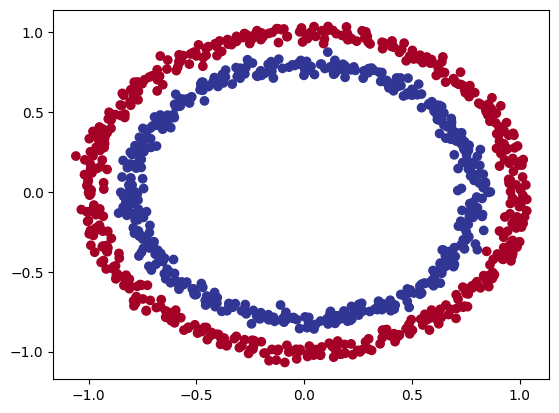

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.RdYlBu)

## Input and Output Shapes

In [16]:
X.shape, Y.shape

((1000, 2), (1000,))

## Modelling

In [18]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, Y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 4.8184 - accuracy: 0.4710
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 3.9167 - accuracy: 0.4700
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.8653 - accuracy: 0.4970
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7180 - accuracy: 0.4960
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7025 - accuracy: 0.4970


In [19]:
# Train our model for longer (more chances to look at the data)
model_1.fit(X, Y, epochs=200, verbose=0) # set verbose=0 to remove training updates
model_1.evaluate(X, Y)   

32/32 [==============================] - 0s 871us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [22]:
# Try adding another layer
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_1 but with an extra layer)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) 
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, Y, epochs=100, verbose=0)

In [23]:
# Evaluate the model
model_2.evaluate(X, Y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932425498962402, 0.5]

## Improving the model

In [24]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  ## After TensorFlow 2.8.0 ##
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [26]:
# 3. Fit the model
model_3.fit(X, Y, epochs=100, verbose=1) # fit for 100 passes of the data

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 2.6536 - accuracy: 0.4720
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7126 - accuracy: 0.4750
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.4770
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.4850
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.4800
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6960 - accuracy: 0.4440
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.5100
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6956 - accuracy: 0.5090
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6983 - accuracy: 0.4920
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.4570
Epoch 11/

32/32 [==============================] - 0s 2ms/step - loss: 0.7011 - accuracy: 0.4580
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6971 - accuracy: 0.5060
Epoch 85/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6972 - accuracy: 0.4750
Epoch 86/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7017 - accuracy: 0.4870
Epoch 87/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6982 - accuracy: 0.4650
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6985 - accuracy: 0.4640
Epoch 89/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6983 - accuracy: 0.4770
Epoch 90/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6983 - accuracy: 0.4850
Epoch 91/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6998 - accuracy: 0.5060
Epoch 92/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6994 - accuracy: 0.4810
Epoch 93/100


We've pulled out a few tricks but our model isn't even doing better than guessing.

Let's make some visualizations to see what's happening.

    🔑 Note: Whenever your model is performing strangely or there's something going on with your data you're not quite sure of, remember these three words: visualize, visualize, visualize. Inspect your data, inspect your model, inpsect your model's predictions.

To visualize our model's predictions we're going to create a function plot_decision_boundary() which:

    Takes in a trained model, features (X) and labels (y).
    Creates a meshgrid of the different X values.
    Makes predictions across the meshgrid.
    Plots the predictions as well as a line between the different zones (where each unique class falls).

If this sounds confusing, let's see it in code and then see the output.

    🔑 Note: If you're ever unsure of what a function does, try unraveling it and writing it line by line for yourself to see what it does. Break it into small parts and see what each part outputs.


In [46]:
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    This function has been adapted from two phenomenal resources:
    1. CS231n - https://cs231n.github.io/neural-networks-case-study/
    2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
    """
 # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
    # Create X values (we're going to predict on all of these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
    y_pred = model.predict(x_in)

  # Check for multi-class
    if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
        print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classifcation...")
        y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 901us/step
doing binary classifcation...


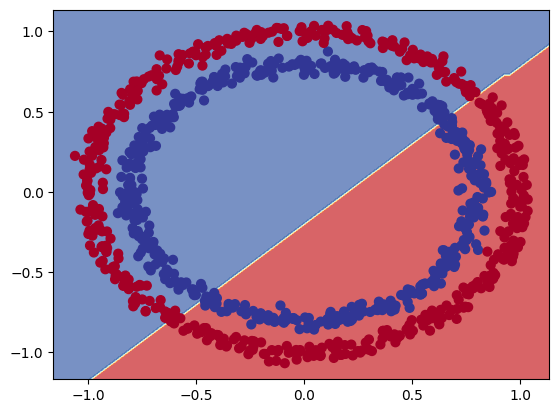

In [47]:
# Check out the predictions our model is making
plot_decision_boundary(model_3, X, Y)

## Trying on a regression problem

In [49]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [50]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), 
            y_reg_train, 
            epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 3ms/step - loss: 372.3070 - mae: 372.3070
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 260.3407 - mae: 260.3407
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 151.0386 - mae: 151.0386
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 52.4762 - mae: 52.4762
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 74.6666 - mae: 74.6666
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 77.1502 - mae: 77.1502
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 49.1054 - mae: 49.1054
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 50.3085 - mae: 50.3085
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 45.4909 - mae: 45.4909
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 45.4004 - mae: 45.4004
Epoch 11/100
5/5 [==============================] - 0

5/5 [==============================] - 0s 2ms/step - loss: 38.9997 - mae: 38.9997
Epoch 88/100
5/5 [==============================] - 0s 2ms/step - loss: 38.7407 - mae: 38.7407
Epoch 89/100
5/5 [==============================] - 0s 2ms/step - loss: 38.9609 - mae: 38.9609
Epoch 90/100
5/5 [==============================] - 0s 3ms/step - loss: 38.7211 - mae: 38.7211
Epoch 91/100
5/5 [==============================] - 0s 2ms/step - loss: 38.4596 - mae: 38.4596
Epoch 92/100
5/5 [==============================] - 0s 2ms/step - loss: 38.8415 - mae: 38.8415
Epoch 93/100
5/5 [==============================] - 0s 2ms/step - loss: 39.1183 - mae: 39.1183
Epoch 94/100
5/5 [==============================] - 0s 2ms/step - loss: 38.2976 - mae: 38.2976
Epoch 95/100
5/5 [==============================] - 0s 3ms/step - loss: 38.8297 - mae: 38.8297
Epoch 96/100
5/5 [==============================] - 0s 2ms/step - loss: 38.6946 - mae: 38.6946
Epoch 97/100
5/5 [==============================] - 0s 2ms/step

In [51]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(y_reg_test)

2/2 [==============================] - 0s 4ms/step


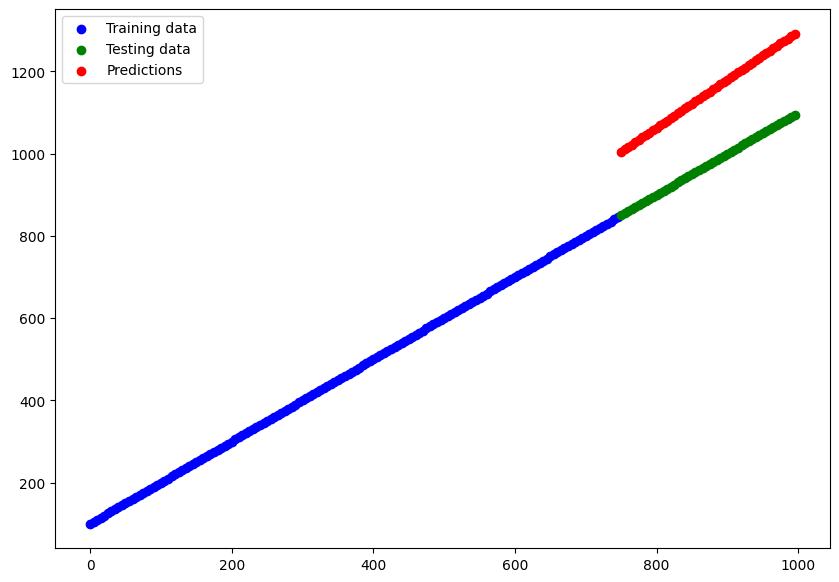

In [52]:
# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

Okay, the predictions aren't perfect (if the predictions were perfect, the red would line up with the green), but they look better than complete guessing.

So this means our model must be learning something...

There must be something we're missing out on for our classification problem.

## The missing piece: Non-linearity